# Introducción a las Series de Tiempo

## Configuración inicial

### Cargamos nuestras librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
from datetime import datetime

### Cargamos y preparamos los datos

In [3]:
df = pd.read_csv('./Data/AirPassengers.csv')

In [4]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

## Trabajando con Series de Tiempo

#### Ajustamos el formato de los datos

In [5]:
df['Month'] = pd.to_datetime(df['Month'])

#### Ajustamos el indice de nuestro dataset

In [6]:
df.set_index('Month', inplace=True)

In [7]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Convertimos nuestro dataframe en una serie de tiempo

In [8]:
ts = df['#Passengers']

In [9]:
# Consultando por el indice
ts['1949-01-01']

112

In [10]:
# Consultar utilizando la libreria datetime
ts[datetime(1949,1,1)]

112

In [11]:
# Consultar un rango de fechas
ts['1949-01-01':'1949-12-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [12]:
# Traer un rango hasta una fecha concreta
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [13]:
# Traer todos los datos de un año
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

## Estacionariedad

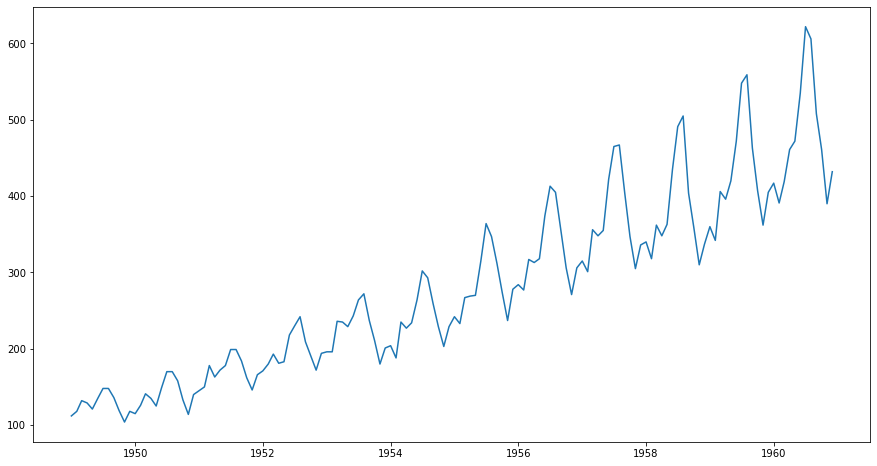

In [14]:
plt.figure(figsize=(15,8))
plt.plot(ts)

### Media y desviación estandar movil

In [15]:
from statsmodels.tsa.stattools import adfuller

In [96]:
def rolling_MS(timeseries):
    rolmean = timeseries.rolling(12, center=True).mean()
    rolstd = timeseries.rolling(12, center=True).std()

    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label ='Media Movil')
    plt.plot(rolstd, color='green', label="Std Movil")
    plt.legend(loc='best')
    plt.title('Media Movil y Std Movil')

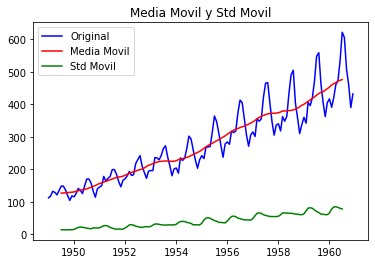

In [97]:
rolling_MS(ts)

### El test de Dickey-Fuller

In [64]:
wf = pd.DataFrame(columns=['c'])

def test_DF(timeseries):
    models = ['c', 'ct', 'ctt', 'nc']
    for i in range(len(models)):
        dftest = adfuller(timeseries, autolag='AIC', regression=models[i])
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                                 'p-value',
                                                 '# Lags',
                                                 'Number of Observations'])
        for key, value in dftest[4].items():
            dfoutput['Critical value (%s)'%key] = value
        wf[models[i]] = dfoutput

In [65]:
test_DF(ts)

In [66]:
wf

,c,ct,ctt,nc
Test Statistic,0.815369,-2.100782,-3.233678,2.390602
p-value,0.991880,0.545659,0.195942,0.997180
# Lags,13.000000,13.000000,13.000000,13.000000
Number of Observations,130.000000,130.000000,130.000000,130.000000
Critical value (1%),-3.481682,-4.030152,-4.462542,-2.583153
Critical value (5%),-2.884042,-3.444818,-3.878611,-1.943251
Critical value (10%),-2.578770,-3.147182,-3.581753,-1.614926


## Hacer la serie estacionaria

### Suavizamos nuestra serie

In [67]:
ts_log = np.log(ts)

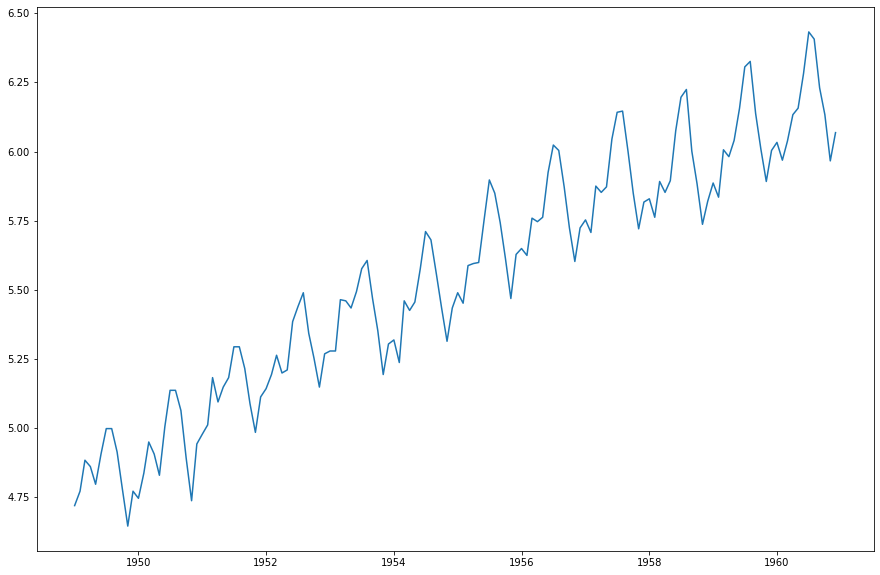

In [71]:
plt.figure(figsize=(15,10))
plt.plot(ts_log)

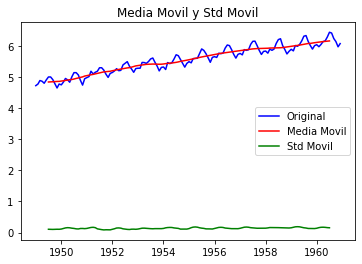

In [98]:
rolling_MS(ts_log)

In [99]:
moving_avg = ts_log.rolling(12, center=True).mean()

In [103]:
ts_diff_mean = ts_log - moving_avg

In [108]:
ts_diff_mean.dropna(inplace=True)

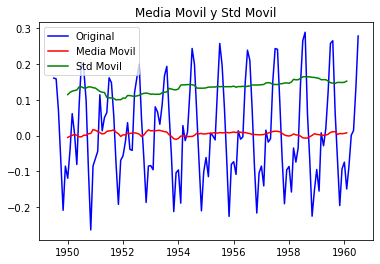

In [109]:
rolling_MS(ts_diff_mean)

In [110]:
test_DF(ts_diff_mean)

In [111]:
wf

,c,ct,ctt,nc
Test Statistic,-4.492454,-4.519067,-4.478075,-2.946760
p-value,0.000203,0.001405,0.007024,0.003158
# Lags,13.000000,13.000000,13.000000,13.000000
Number of Observations,119.000000,119.000000,119.000000,119.000000
Critical value (1%),-3.486535,-4.036934,-4.471237,-2.584784
Critical value (5%),-2.886151,-3.448049,-3.882970,-1.943476
Critical value (10%),-2.579896,-3.149068,-3.584424,-1.614765
